In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Admission_Predict.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.shape

(400, 9)

In [6]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


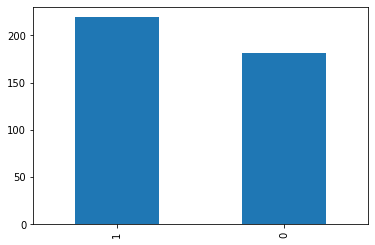

In [14]:
df.Research.value_counts().plot(kind = "bar")
plt.show()

In [15]:
import seaborn as sns

/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


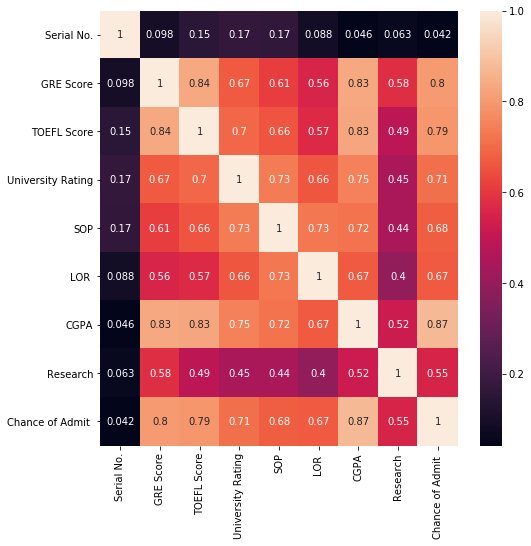

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(abs(df.corr()), annot = True)
plt.show()

In [35]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [37]:
x = df.iloc[:,0:7]

In [38]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [39]:
y = df.iloc[:,-1]

In [41]:
y.shape

(400,)

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2)

In [43]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((320, 7), (80, 7), (320,), (80,))

In [44]:
model = LinearRegression()

In [46]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
y_pred = model.predict(x_test)

In [48]:
y_pred

array([0.84378247, 0.71579449, 0.69488305, 0.66613292, 0.90791873,
       0.7309057 , 0.63178133, 0.81716582, 1.00483804, 0.69327543,
       0.68845268, 0.61789765, 0.79025705, 0.95133023, 0.79937004,
       0.75227746, 0.73511259, 0.55250449, 0.84303033, 0.6176875 ,
       0.54214784, 0.62134625, 0.48228708, 0.76809074, 0.81121424,
       0.74200099, 0.62769382, 0.87173473, 0.59418767, 0.83075492,
       0.961587  , 0.47439912, 0.94096019, 0.85633898, 0.396366  ,
       0.78694789, 0.82908339, 0.9117208 , 0.70898479, 0.77970702,
       0.95338241, 0.66776055, 0.77434934, 0.82067347, 0.60999996,
       0.70930126, 0.68093334, 0.79253101, 0.70462117, 0.70033303,
       0.7984055 , 0.87924372, 0.76684539, 0.64213131, 0.69935636,
       0.86324313, 0.69070569, 0.72874713, 0.62645209, 0.63012323,
       0.67614167, 0.76435068, 0.55606019, 0.80939303, 0.97266983,
       0.91264345, 0.76146991, 0.53775595, 0.99517206, 0.5832143 ,
       0.49357418, 0.54023563, 0.76323343, 0.64060133, 0.75728

In [50]:
y_pred = pd.Series(y_pred)

In [57]:
df_pred = pd.DataFrame({"original" : y_test, "predicted" : y_pred})

In [58]:
df_pred

,original,predicted
0,NaN,0.843782
1,NaN,0.715794
2,NaN,0.694883
3,NaN,0.666133
4,NaN,0.907919
...,...,...
393,0.77,NaN
395,0.82,NaN
396,0.84,NaN
398,0.67,NaN


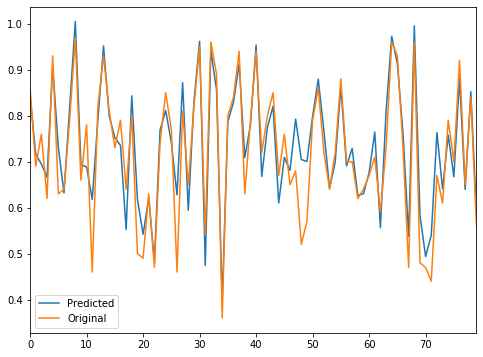

In [62]:
plt.figure(figsize=(8,6))
y_pred.plot(label = "Predicted")
y_test.reset_index(drop = True).plot(label = "Original")
plt.legend()
plt.show()

In [61]:
y_test.reset_index(drop = True)

0     0.86
1     0.69
2     0.76
3     0.62
4     0.93
      ... 
75    0.70
76    0.92
77    0.65
78    0.84
79    0.56
Name: Chance of Admit , Length: 80, dtype: float64

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mse = mean_squared_error(y_test.reset_index(drop=True), y_pred)

In [65]:
mse

0.0033965075106639647

In [66]:
mse**0.5

0.058279563404884605

In [67]:
from sklearn.metrics import r2_score

In [68]:
r2 = r2_score(y_test.reset_index(drop=True), y_pred)

In [69]:
r2

0.8440179128411446

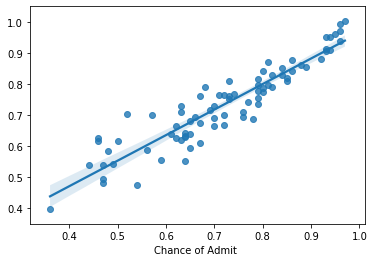

In [71]:
sns.regplot(y_test.reset_index(drop=True), y_pred)
plt.show()